In [1]:
# A bit of setup
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

<!-- dom:TITLE: Homework 1, PHY 959 -->
<!-- dom:AUTHOR: [PHY 959: Machine Learning in Physics]-->


# PHY 959: Homework Set #3
Due: **February 23, 2021**

___
***


# Problem 2: Exploring Agglomerative Clustering

In this problem, we will gain some experience with agglomerative clustering which is a type of hierarchical clustering algorithm.  As with k-Means, the algorithm is relatively simple.  We first define a "linkage" to describe the distance (or relationship) between two objects.  The clustering algorithm then uses this definition to iteratively associate objects, forming and growing clusters as objects are associated.  
The most common linkages are:

1. Single linkage: distance between clusters is determined by the minimum distance between any two elements of the clusters.
1. Complete linkage: distance between clusters is determined by the maximum distance between any two elements of the clusters.
1. Average linkage: distance between clusters is the average of all inter-cluster pairings.
1. Centroid linkage: distrance between clusters is between the cluster centroids.
1. Ward's linkage: distance between clusters is the within-cluster distance based on squared distance between cluster centroids.

In addition, there are many ways to measure the "distance" between two points in space.  These distance metrics each change how the dimensions are interpreted.  For the purposes of this problem, we will stick with the `euclidean`, though many area vailable in both `scikit-learn` and `sciPy`:

‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’

This problem will be very similar to problem 1, in which we will explore the response of the Agglomerative clustering algorithm with Gaussian "blobs" and with the market data.

# Part 1: Agglomerative Clustering of Gaussian Data

As in problem one, we'll make a Gaussian cluster dataset and adjust the parameters to study our clustering algorithm.

## Part 1a: Getting comfortable with agglomerative clustering

Your task is to run agglomerative clustering several times but varying the following: 
- `n_trueClusters` (the true number of clusters to be generated)
- `std_dev` (spatial size of the clusters) 
- `n_samples` (the number of data points in the clusters) 
- `n_agClusters` (the number of clusters to be created by the agglomerative clustering algorithm) 

You're welcome to use either the `scikit-learn` implementation of agglomerative clustering, or choose the `sciPy` version.  If you do choose `sciPy`, the dendogram plots will be a helpful way to view the clustering process and may bring insight to your studies.

***
***

### Part 1a: Questions to answer
Compare and contrast the response of k-Means and agglomerative clustering to the following.  Make use of your performance metrics to support your conclusions.  By plotting your metrics as a function of parameters, you can make your results more clear.  Note that different linkages will give varying results, so take that into consideration.

1. The cluster standard deviation. 
1. The number of points in the clusters? 
1. The number of true clusters?
***

___
### First let's define some useful functions
---

In [2]:
#Plotting function
def plot_clusters(labels, clusters, X,idx1=0,idx2=1,xlabel="X",ylabel="Y",linkLabel="none"):
    unique_labels = set(labels)
    colors = cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, idx1], xy[:, idx2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5, alpha=0.5)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(clusters[k,idx1],clusters[k,idx2],'o',markerfacecolor=col,
             markeredgecolor='k', markersize=20,alpha=0.8)
    plt.title("Linkage = {}".format(linkLabel))  
    
#calculate cluster centers, as Agglomerative clustering doesn't do this by default
def getClusterCenters(X,labels):
    ncl = np.max(labels)+1
    dims = X[0,:].size
    
    centers = np.zeros((ncl,dims))
    
    for idx in range(ncl):
        for dim in range(dims):
            centers[idx,dim] = np.mean(X[labels==idx,dim])
    
    return centers

# Convenient way of getting metrics
def rank_clusters(X,labels,truth_labels=[],verbose=True):
    retval = np.zeros(2)
    retval[0] = metrics.silhouette_score(X,labels) #larger is better!
    retval[1] = metrics.davies_bouldin_score(X,labels) #lower is better!
    if verbose:
        print("Silhouette Score: ",retval[0])
        print("Davies-Bouldin Score: ",retval[1])
    
    return retval

def get_pdist(model,X,verbose=True):
    c, coph_dists = cophenet(model, pdist(X))
    print("Cophenetic Correlation Coefficient: ",c)
    return c

___
### Generate Data
---

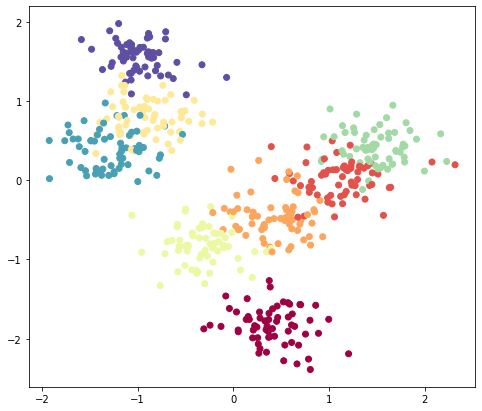

In [3]:
#Set cluster standard deviation and cluster number
std_dev=1
n_trueClusters = 8
n_dim = 2  #you can do this in N-D, but let's use 2D for easy viewing
n_points = 500
randState = 2

# Generate sample data
X, labels_true = make_blobs(centers=n_trueClusters,n_samples=n_points, 
                            n_features=n_dim, cluster_std=std_dev,random_state=randState)

# Perform standard scaling on the full set of clusters
X = StandardScaler().fit_transform(X)

#plot the data as a sanity check!
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=labels_true,cmap=cm.Spectral)
plt.show()

***
### Now let's let agglomerative clustering find the clusters!

Just like with k-Means, we just need to specify the number of clusters we want to find and we're all set.
***


Linkage =  average


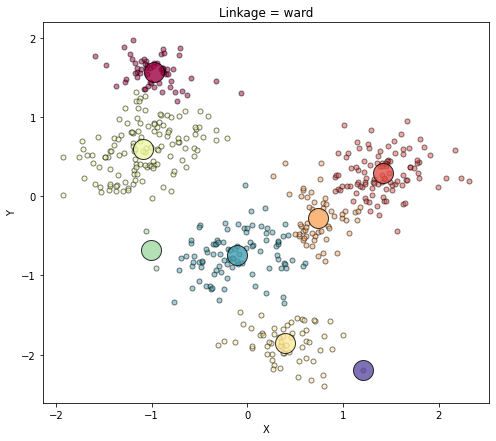

Silhouette Score:  0.40029360533388764
Davies-Bouldin Score:  0.6501608252116933
Cophenetic Correlation Coefficient:  0.815083322157239

Linkage =  complete


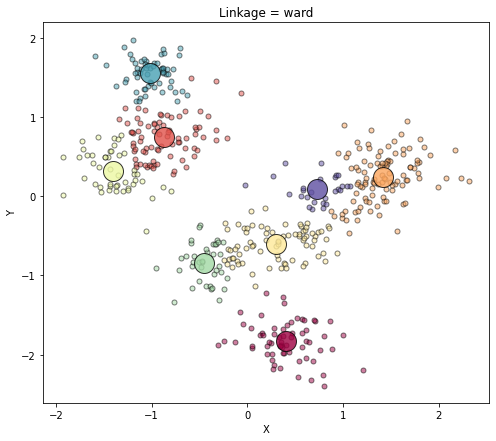

Silhouette Score:  0.3947167507413208
Davies-Bouldin Score:  0.814469745707851
Cophenetic Correlation Coefficient:  0.8003054879211907

Linkage =  single


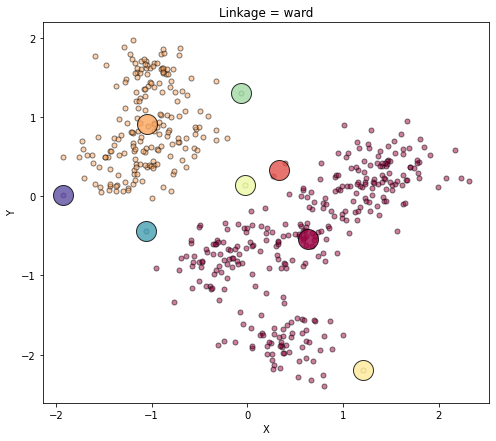

Silhouette Score:  -0.1405375265727514
Davies-Bouldin Score:  0.7639121487721483
Cophenetic Correlation Coefficient:  0.743687274432839

Linkage =  ward


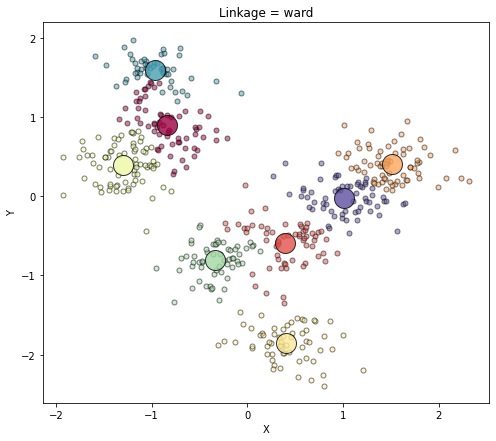

Silhouette Score:  0.40593642625267123
Davies-Bouldin Score:  0.8564750889751622
Cophenetic Correlation Coefficient:  0.8081237335094349


In [4]:
#First set up your parameters
n_agClusters=8 #Set Number of Clusters

links = {'ward','complete','single','average'}

for ilk in links:
    print("\nLinkage = ",ilk)
    #scikit-learn implementation
    clustering = AgglomerativeClustering(linkage=ilk, n_clusters=n_agClusters)
    clustering = clustering.fit(X)
    centers = getClusterCenters(X,clustering.labels_)
    fig = plt.figure()
    plot_clusters(clustering.labels_,centers,X,linkLabel="ward")
    plt.show()
    rank_clusters(X,clustering.labels_)

    #sciPy implementation to check p-distance
    mergings = linkage(X, method=ilk, metric='euclidean')
    get_pdist(mergings,X)

***
***
# Part 2: Clustering market data

Just as in Problem 1, we'll use our intuition of agglomerative clustering learned from Part 1 to study the market data again.  You've already arrived at a conclusion for this data, so the key here will be to find if your results still agree.  If they are vastly different, something is probably not right.  But look for nuances that can help you decide which approach was more useful to your task of performing the Market Basket Analysis.

## Your Task:

  1. Set up your code to perform agglomerative clustering on the market customer data.  Even though you have a favorite number of clusters found in Problem 1 Part 2, you should explore cluster number again.
  
  2. Contrast k-Means and agglomerative clustering for this data sample.


## Read in the data and analyze the structure

In [ ]:
# we're using seaborn to read the CSV file, so let's set it up with 
# good behavior for notebooks
sns.set(context="notebook" , color_codes=True)
print(os.listdir("."))

# Importing the dataset
dataset = pd.read_csv('./Market_Customers.csv',index_col='CustomerID')
dataset.head()

# check for duplicates and remove them if found
dataset.drop_duplicates(inplace=True)

***
***
### Now let's access the data and get ready for clustering

In [6]:
#First set up your parameters
n_agClusters=5 #Set Number of Clusters


# extract your data by the indices in the dataset:
# 0 = Gender
# 1 = Age
# 2 = Annual Income
# 3 = Spending Score
# This example obtains an array with Age, Income and Score.  Reduce/swap/reorder as desired.
Xmarket = dataset.iloc[:, [1,2,3]].values
#Xmarket = dataset.iloc[:, [2,3]].values #this version just grabs Income and Score

#check the shape of the data
print(Xmarket.shape)

(200, 3)
